In [7]:
###1 import 所有模組
import time, pyodbc
from selenium import webdriver
from flask import Flask, render_template
from datetime import timedelta
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
###2 利用 selenium 爬蟲
import time
from selenium import webdriver
from selenium.webdriver.firefox.options import Options

# 設定 Chrome 選項
options = Options()
driver = webdriver.Chrome()

driver.get("https://wanpotea.com/shop.php")
print(driver.page_source)

# 等待頁面加載完成
time.sleep(5)

# 選取所有店鋪名稱
store = driver.find_elements("xpath", '//h4')

# 利用 xpath 爬取資料
xpath = '//*[@id="result"]/div['
list_info = []
for i in range(len(store)):
    lst = []
    key1 = 2 + 2 * i
    xpath_h4 = xpath + str(key1) + ']/div[1]/h4'
    xpath_p = xpath + str(key1) + ']/div[1]/p'
    tag_h4 = driver.find_element("xpath", xpath_h4)
    tag_p = driver.find_elements("xpath", xpath_p)
    tag_p = tag_p[:3]
    lst.append(tag_h4.text)
    for data in tag_p:
        lst.append(data.text)
    list_info.append(lst)

driver.close()

<html><head><meta http-equiv="origin-trial" content="Az520Inasey3TAyqLyojQa8MnmCALSEU29yQFW8dePZ7xQTvSt73pHazLFTK5f7SyLUJSo2uKLesEtEa9aUYcgMAAACPeyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb206NDQzIiwiZmVhdHVyZSI6IkRpc2FibGVUaGlyZFBhcnR5U3RvcmFnZVBhcnRpdGlvbmluZyIsImV4cGlyeSI6MTcyNTQwNzk5OSwiaXNTdWJkb21haW4iOnRydWUsImlzVGhpcmRQYXJ0eSI6dHJ1ZX0=">
		<title>門市資訊 - 萬波島嶼紅茶 Wanpo Tea Shop</title>
	

<meta charset="UTF-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge, chrome=1">

<link rel="shortcut icon" href="images/fav.png" type="image/x-icon">
<link rel="apple-touch-icon" href="images/fav.png">
<link rel="apple-touch-icon" sizes="76x76" href="images/fav.png">
<link rel="apple-touch-icon" sizes="120x120" href="images/fav.png">
<link rel="apple-touch-icon" sizes="152x152" href="images/fav.png">


<!-- Design 很好設計 www.goods-design.com.tw -->

<!-- Coding 很好設計 www.goods-design.com.tw -->

<!-- Front End 很好設計 www.goods-design.com.tw -->

<!-- Back End 很好設計 www.goods-design.com.tw -->

<style>
.

In [9]:
###3 將資料轉成DataFrame形式，並將內容整理，接著存成csv檔
import pandas as pd

# 轉成DataFrame
df = pd.read_excel('wanpotea.xlsx', sheet_name='Sheet1')

# 資料整理、清洗

print(df)
df['ShopName'] = df['ShopName'].str.replace('門市/ ','')
df['ShopName'] = df['ShopName'].str.split(expand=True)[0]

df['Tel'] = df['Tel'].str.replace('電話/',' ')
df['Area'] = df['Area'].str.replace('地區/',' ')
df['FullAddress'] = df['FullAddress'].str.replace('地址/','')
df['FullAddress'] = df['FullAddress'].str.replace(' ','')
df['BusinessHours'] = df['BusinessHours'].str.replace('營業時間','')
df['BusinessHours'] = df['BusinessHours'].str.replace(' ','')
df['BusinessHours'] = df['BusinessHours'].str.replace('\n','/')

# 存成cvs檔
df.to_csv('wanpotea_store_info.csv', encoding='utf-8-sig')

   ShopName            Tel Area          FullAddress  \
0     台北衡陽店  (02)2382-5808  台北市         台北市中正區衡陽路25號   
1     木柵保儀店  (02)2936-8688  台北市          台北市文山區保儀路4號   
2     台北八德店  (02)2578-9833  台北市  台北市松山區八德路3段223-1號1樓   
3     台北大安店  (02)2706-4888  台北市         台北市大安區東豐街35號   
4     台北天母店  (02)2838-1282  台北市       台北市士林區德行東路197號   
..      ...            ...  ...                  ...   
78    高雄富國店   (07)5585-580  高雄市          高雄市左營區富國路1號   
79    東港中山店   (08)8338-583  屏東縣       屏東縣東港鎮中山路13之1號   
80    恆春南門店   (08)8883-947  屏東縣         屏東縣恆春鎮南門路24號   
81    台東中華店     089-332208  台東縣      台東縣台東市中華路一段326號   
82    萬波澎湖店   (06)9267-168  澎湖縣      澎湖縣馬公市長安里中興路67號   

                                  BusinessHours  
0   週一~五10:00–20:30 週六11:00–20:30 週日12:00–20:30  
1                               週一~日10:00–21:00  
2   週一~五10:00–20:30 週六11:00–20:30 週日12:00–20:30  
3   週一~五10:00–20:30 週六11:00–20:30 週日12:00–20:30  
4                               週一~日10:00–21:00  
..                         

In [11]:
###4 建立mysql server資料表
import pyodbc
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="root",
  database="testdb"
)
mycursor = mydb.cursor()



sql='''CREATE TABLE Wanpotea(
    ID int NOT NULL IDENTITY(1,1) PRIMARY KEY,
    ShopName varchar(50),
    Tel nvarchar(50),
    Area nvarchar(50),
    FullAddress nvarchar(150),
    BusinessHours nvarchar(150));'''

mycursor.execute("CREATE TABLE Wanpotea(ID int PRIMARY KEY AUTO_INCREMENT,ShopName varchar(50),Tel nvarchar(50),Area nvarchar(50),FullAddress nvarchar(150),BusinessHours nvarchar(150))")

In [13]:
###5 與資料庫連線，將csv檔以DataFrame形式存入 SQL Sever
import pyodbc
import pandas as pd

#資料庫連線
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="root",
  database="testdb"
)
mycursor = mydb.cursor()

df= pd.read_csv('./wanpotea_store_info.csv',encoding='utf-8-sig')#從csv檔建立一個DataFrame物件


for i , row in df.iterrows():
  sql = "INSERT INTO Wanpotea(ShopName, Tel, Area, FullAddress, BusinessHours) VALUES (%s, %s, %s, %s, %s)"
  mycursor.execute(sql, tuple(row))
  mydb.commit()

mydb.close()

C:\Users\kaoky\AppData\Local\Temp\ipykernel_22764\3793413270.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


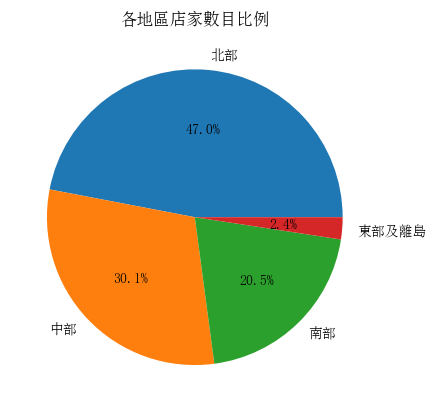

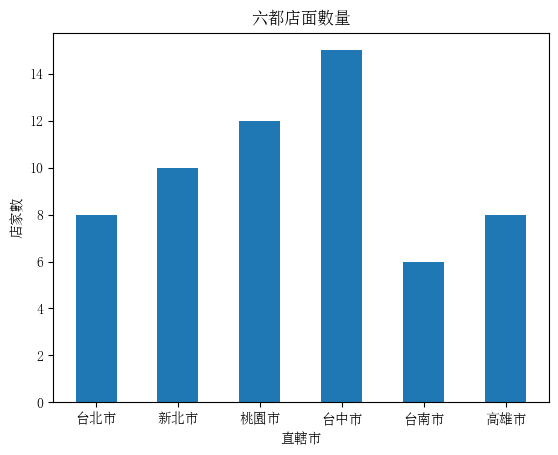

In [14]:
###6
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import pymysql


def connect_to_database():
    try:
        conn = pymysql.connect(
            host="localhost",
            user="root",
            password="root",
            database="testdb"
        )
        return conn
    except mysql.Error as e:
        print(f"Error connecting to database: {e}")
        return None

def retrieve_data(conn):
    if conn is None:
        return None
    try:
        # mycursor = conn.cursor()
        sql = '''SELECT * FROM Wanpotea'''
        df = pd.read_sql(sql, conn)
        
        return df
    except pd.errors.EmptyDataError:
        print("No data retrieved from the database.")
        return None

def visualize_data(df):
    if df is None:
        return

    # Adjusting pandas settings
    pd.set_option('display.unicode.ambiguous_as_wide', True)

    # Grouping data by county
    count = df.groupby('Area')['ID'].count()
    count['連江縣'] = count.get('連江縣', 0)  # Handling missing counties
    count['花蓮縣'] = count.get('花蓮縣', 0)

    # Pie chart
    labels = ['北部', '中部', '南部', '東部及離島']
    sizes = [count['台北市'] + count['新北市'] + count['基隆市'] + count['桃園市'] +
            count['新竹縣'] + count['新竹市'] + count['宜蘭縣'],
            count['苗栗縣'] + count['台中市'] + count['彰化縣'] + count['南投縣'] +
            count['雲林縣'],
            count['嘉義市'] + count['台南市'] + count['高雄市'] +
            count['屏東縣'],
            count['花蓮縣'] + count['台東縣'] + count['澎湖縣'] +
            count['連江縣']]
    
    # 數據資料視覺化
    plt.rcParams['font.sans-serif'] = ['simsun'] # 設定字型，調整設定，讓中文可以正確顯示
    plt.rcParams['axes.unicode_minus'] = False # 宋體:simsun
    plt.figure()
    plt.pie(sizes, labels=labels, autopct="%2.1f%%")
    plt.title('各地區店家數目比例')
    plt.savefig(r"d:\Area.png")
    plt.show()

    # Bar chart
    listx = ['台北市', '新北市', '桃園市', '台中市', '台南市', '高雄市']
    listy = [count['台北市'], count['新北市'], count['桃園市'],
             count['台中市'], count['台南市'], count['高雄市']]
    plt.figure()
    plt.bar(listx, listy, width=0.5)
    plt.title('六都店面數量')
    plt.xlabel('直轄市')
    plt.ylabel('店家數')
    plt.savefig(r"d:\shopAmount.png")
    plt.show()

def main():
    # Connect to database
    conn = connect_to_database()
    
    if conn is None:
         return

    # Retrieve data from database
    df = retrieve_data(conn)

    # Visualize data
    visualize_data(df)

    # Close database connection
    conn.close()

if __name__ == "__main__":
    main()

In [18]:
###7 與資料庫連線，將資料以Flask的方式呈現在網頁上
import pyodbc
import pandas as pd

#　資料庫連線，讀取SQL
conn = pymysql.connect(
            host="localhost",
            user="root",
            password="root",
            database="testdb")
sql = '''SELECT * FROM Wanpotea'''
df = pd.read_sql(sql, conn)

# (重複)以groupby的方式統計各縣市資料數，並將資料轉成字典形式
count = df.groupby('Area')['ID'].count()
dict_ = count.to_dict()

if '連江縣' not in dict_:
    dict_['連江縣'] = 0
if '花蓮縣' not in dict_:
    dict_['花蓮縣'] = 0

#Flask
from flask import Flask, request, render_template
from datetime import timedelta
app = Flask(__name__, template_folder='./templates')
app.config['SEND_FILE_MAX_AGE_DEFAULT'] = timedelta(seconds=60) # 設定圖片的快取時間為1分鐘

@app.route('/')
def home():
    dict_c = dict_
    return render_template('home.html', **locals())

app.run()
conn.close()


 * Serving Flask app '__main__'
 * Debug mode: off


C:\Users\kaoky\AppData\Local\Temp\ipykernel_22764\3743859646.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
